In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

c:\Users\Razmik\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Razmik\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Razmik\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [10]:
class CannonComparison:
    def __init__(self, grids = [1024, 2048, 4096], thread_nums = [1, 4, 16, 64]):
        self.grids = grids
        self.thread_nums = thread_nums

        self.values_iter = []
        self.values_paral = []

        self.readFromFilesIterative()
        self.readFromFilesParallel()

        self.yeah = 0

    def readFromFilesIterative(self, **kwargs):
        grids = self.grids

        if 'grids' in kwargs:
            time_steps = kwargs['grids']

        for i in grids:
            f = open(f'Performance/{i}/1', 'r')
            self.values_iter.append(float(f.read()))
            f.close()
    
    def readFromFilesParallel(self, **kwargs):
        grids = self.grids
        thread_nums = self.thread_nums

        if 'grids' in kwargs:
            time_steps = kwargs['grids']

        if 'thread_nums' in kwargs:
            thread_nums = kwargs['thread_nums']

        for i in grids:
            for j in thread_nums:
                f = open(f'Performance/{i}/{j}', 'r')
                self.values_paral.append(float(f.read()))
                f.close()

    def printComparison(self):
        subplot_num = len(self.grids)
        threads_num = len(self.thread_nums)

        fig, axs = plt.subplots(subplot_num, sharex=True)

        fig.set_figheight(10)
        fig.set_figwidth(20)

        plt.xlabel("The Number Of Threads Used")

        fig.text(0.08, 0.5, "Time(ms)", ha='center', va='center', rotation='vertical')

        vals = [['']]+[[i, ''] for i in self.thread_nums]
        vals = [item for sublist in vals for item in sublist]

        if subplot_num != 1:
            for i in range(subplot_num):
                axs[i].plot([self.values_iter[i]] * threads_num)
                axs[i].plot(self.values_paral[i * threads_num : i * threads_num + threads_num])
                axs[i].set_title(f"Time required to solve the equation for a {self.grids[i]}x{self.grids[i]} Grid")
                axs[i].set_xticklabels(vals)
        else:
            axs.plot([self.values_iter[0]] * threads_num)
            axs.plot(self.values_paral)
            axs.set_title(f"Time required to solve the equation for a{self.grids[0]}x{self.grids[0]} Grid")
            axs.set_xticklabels(vals)


    def printTimeAnalysis(self):
        val_iter = np.array(self.values_iter)
        val_par  = np.array(self.values_paral)
        threads  = np.array(self.thread_nums)
        thr_len = len(threads)

        for i in range(len(self.grids)):
            res = pd.DataFrame({
                "Thread Num" : threads,
                "Speed-Up" : np.divide([val_iter[i]] * thr_len, val_par[i * thr_len : i * thr_len + thr_len]),
                "Efficiency" : np.divide([val_iter[i]] * thr_len, threads * val_par[i * thr_len : i * thr_len + thr_len])
            })

            display(res.style.set_caption(f"S&E of solving the equations of a {self.grids[i]} grid."))

In [11]:
test = CannonComparison()

In [12]:
test.values_paral

[4302.0,
 1449.0,
 989.0,
 1615.0,
 121618.0,
 18542.0,
 8760.0,
 8995.0,
 1107304.0,
 337624.0,
 115023.0,
 69960.0]

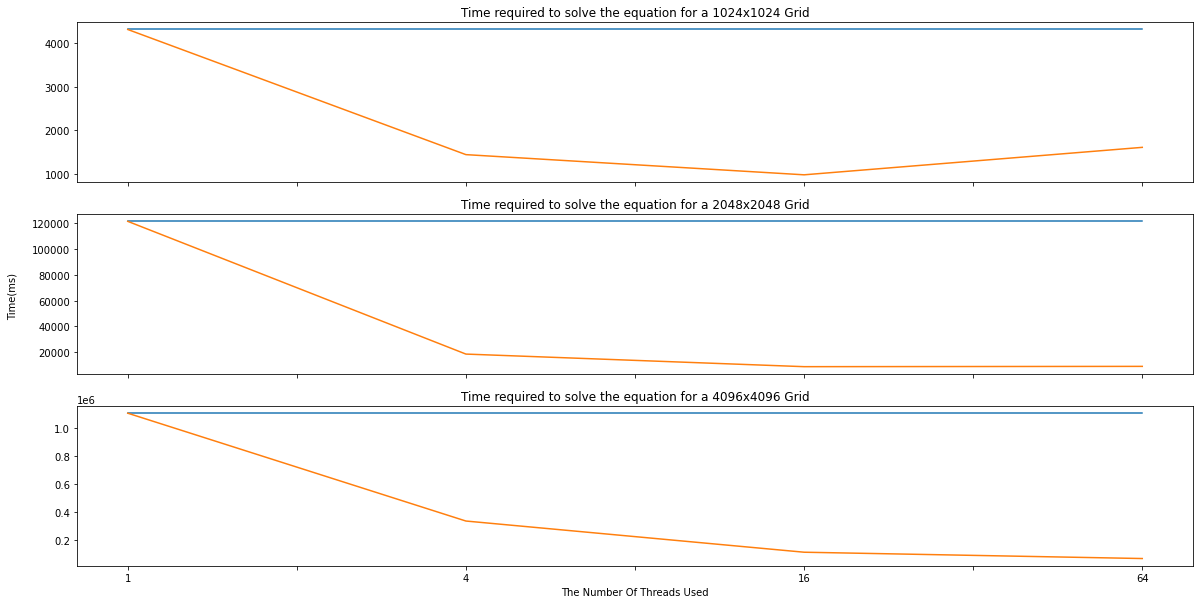

In [13]:
test.printComparison()

In [14]:
test.printTimeAnalysis()

,Thread Num,Speed-Up,Efficiency
0,1,1.000000,1.000000
1,4,2.968944,0.742236
2,16,4.349848,0.271866
3,64,2.663777,0.041622


,Thread Num,Speed-Up,Efficiency
0,1,1.000000,1.000000
1,4,6.559055,1.639764
2,16,13.883333,0.867708
3,64,13.520623,0.211260


,Thread Num,Speed-Up,Efficiency
0,1,1.000000,1.000000
1,4,3.279696,0.819924
2,16,9.626805,0.601675
3,64,15.827673,0.247307
